In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

c:\Users\91982\anaconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import ast 
import pandas as pd
import seaborn as sns 

from datasets import load_dataset
import matplotlib.pyplot as plt 

In [10]:
dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

In [12]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_posted_skill']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)
df.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_skill
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...","[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...","[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...","[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...","[bash, python, oracle, aws, ansible, puppet, j..."


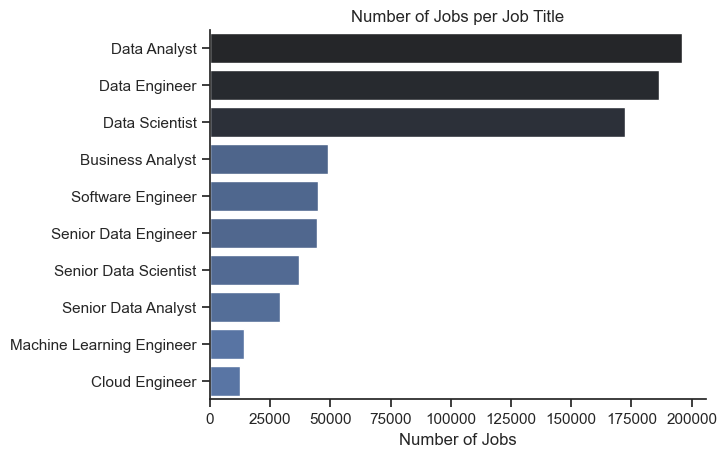

In [26]:

df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

countries to explore


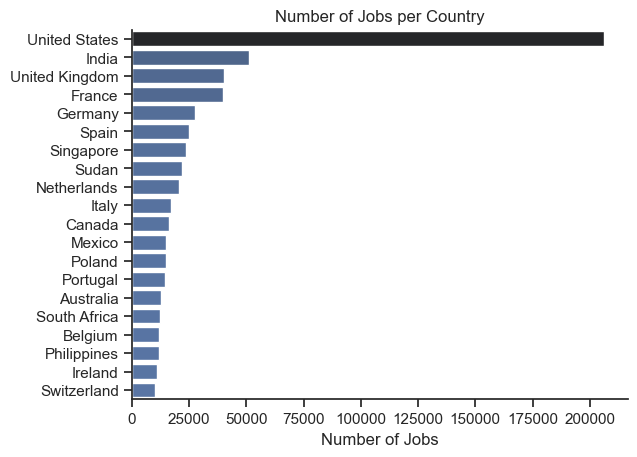

In [27]:

df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

companies


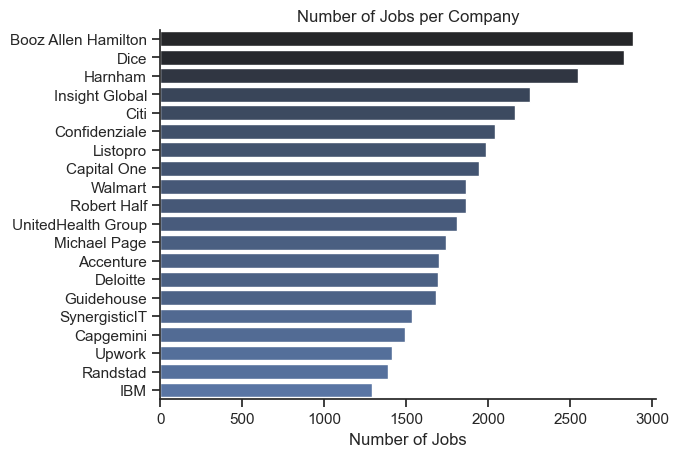

In [28]:

df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

opportunities


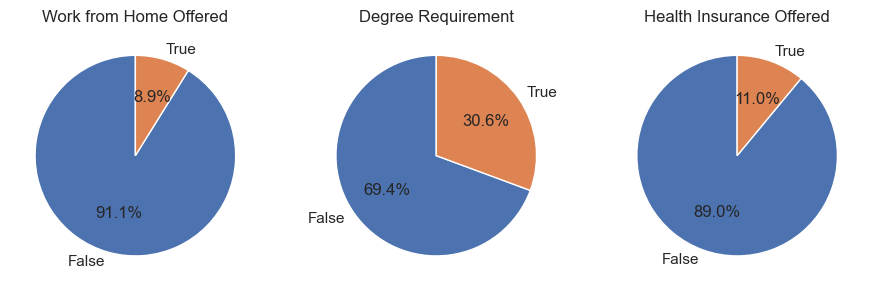

In [29]:

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

filter for india 


In [14]:
df_DA_india = df[(df['job_country']== 'India')& (df['job_title_short']=='Data Analyst')]

In [15]:
df_DA_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_skill
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'...","[sql, python, databricks, power bi, excel, wor..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"['sql', 'excel', 'word', 'powerpoint', 'outloo...","{'analyst_tools': ['excel', 'word', 'powerpoin...","[sql, excel, word, powerpoint, outlook, power bi]"
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,['sql'],{'programming': ['sql']},[sql]
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa...","[sas, sas, sql]"
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"['python', 'sql', 'excel', 'ms access', 'power...","{'analyst_tools': ['excel', 'ms access', 'powe...","[python, sql, excel, ms access, powerpoint]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,['power bi'],{'analyst_tools': ['power bi']},[power bi]
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...","[sql, excel]"
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"['r', 'python', 'sql', 'sap', 'power bi', 'tab...","{'analyst_tools': ['sap', 'power bi', 'tableau...","[r, python, sql, sap, power bi, tableau, excel]"
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"['sql', 'python', 'shell', 'sql server', 'tabl...","{'analyst_tools': ['tableau', 'microstrategy']...","[sql, python, shell, sql server, tableau, micr..."


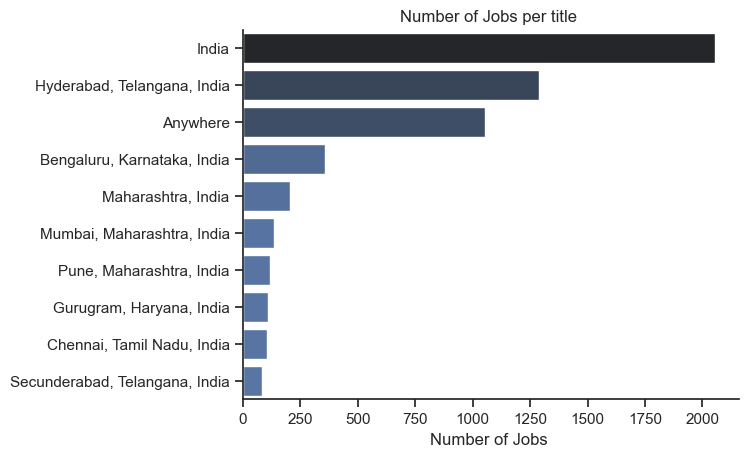

In [25]:
df_plot =df_DA_india['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data = df_plot , x='count' , y='job_location' ,hue='count',  palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per title ')
plt.xlabel('Number of Jobs ')
plt.ylabel('')
plt.show()

degree req 


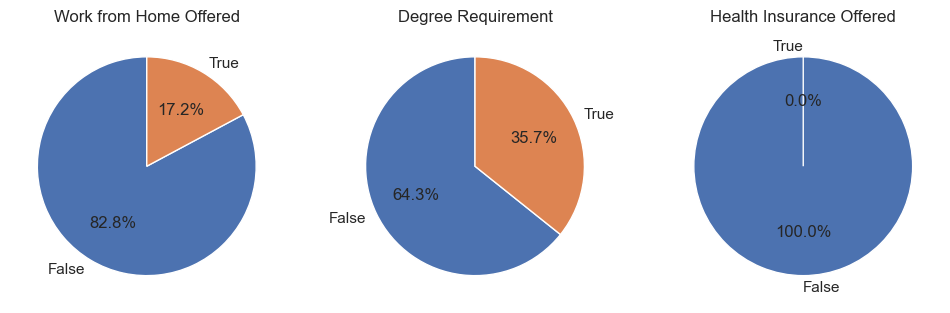

In [31]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    # Get value counts and ensure both False & True exist
    values = df_DA_india[column].value_counts()
    values = values.reindex([False, True], fill_value=0)  # Fill missing with 0

    # Create pie chart
    ax[i].pie(values, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()


companies 

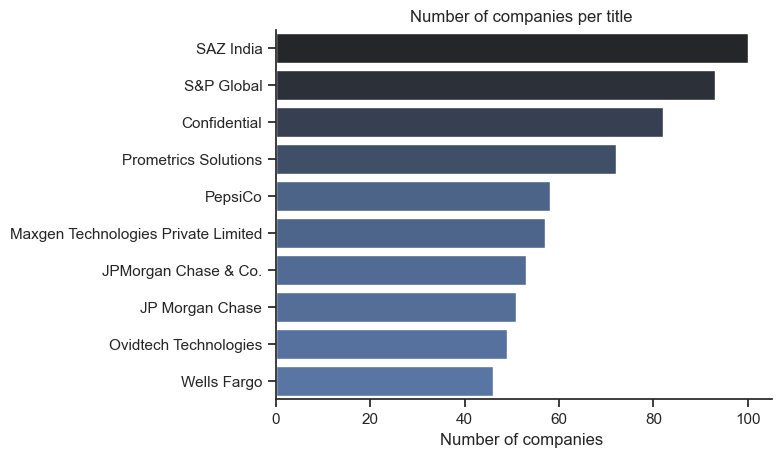

In [32]:
df_plot =df_DA_india["company_name"].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data = df_plot , x='count' , y="company_name" ,hue='count',  palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of companies per title ')
plt.xlabel('Number of companies ')
plt.ylabel('')
plt.show()